In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/models_benchmark.csv')

In [3]:
df.head()

,model,step,vs random,vs random invalid,vs lookahead,vs lookahead invalid,vs negamax,vs negamax invalid
0,PPO_custom_p1,600000,0.66,0,0.13,0,0.01,0
1,PPO_custom_p1,700000,0.65,0,0.15,0,0.00,0
2,PPO_custom_p1,800000,0.58,0,0.15,0,0.01,0
3,PPO_custom_p1,900000,0.66,0,0.18,0,0.03,0
4,PPO_custom_p1,1000000,0.68,0,0.21,0,0.03,0


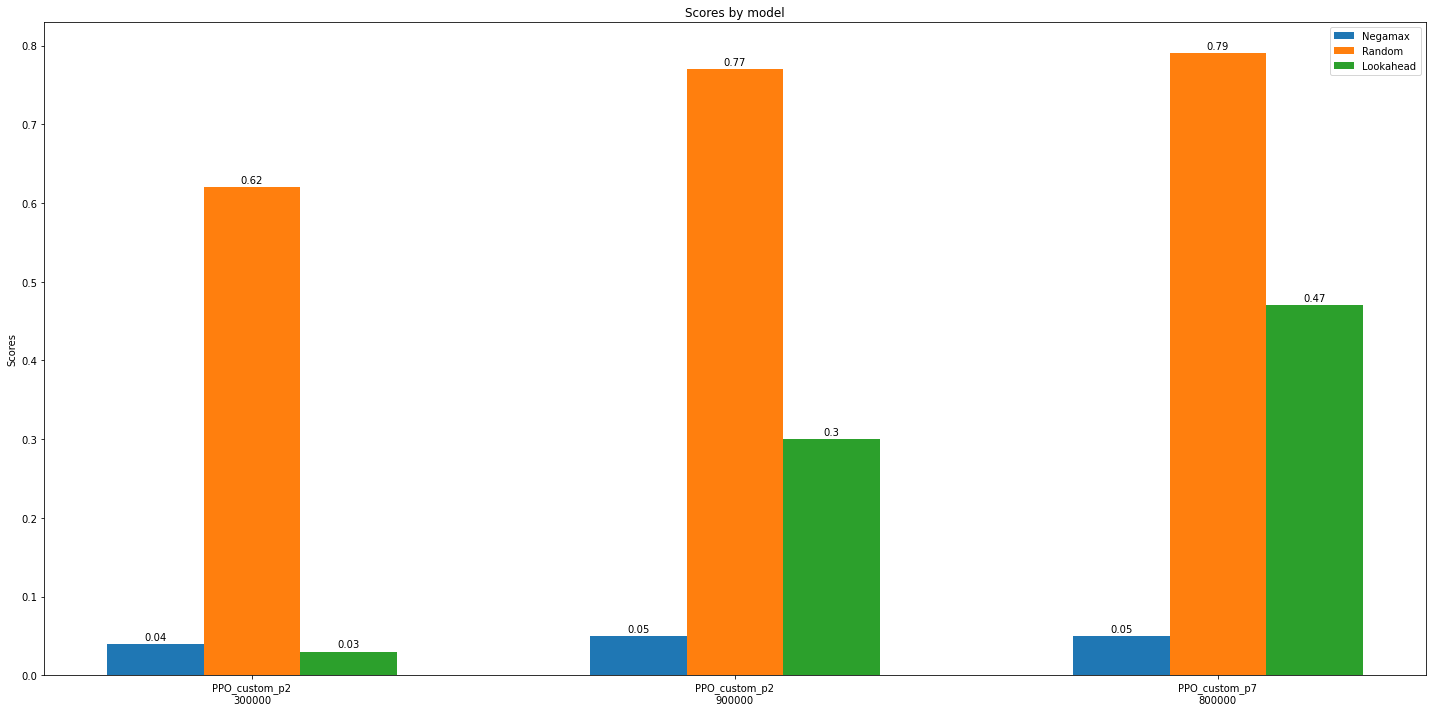

In [4]:
def plot_results(df):
    labels = df.model +"\n"+ df.step.astype(str)
    x = np.arange(len(labels))  # the label locations
    width = 0.60  # the width of the bars
    fig, ax = plt.subplots(figsize=(20, 10))
    rects1 = ax.bar(x - width/3, df['vs negamax'], width/3, label='Negamax')
    rects2 = ax.bar(x, df['vs random'], width/3, label='Random')
    rects3 = ax.bar(x + width/3, df['vs lookahead'], width/3, label='Lookahead')


    ax.set_ylabel('Scores')
    ax.set_title('Scores by model')
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=2)
    ax.bar_label(rects2, padding=2)
    ax.bar_label(rects3, padding=2)

    fig.tight_layout()

    plt.show()

def plot_top_3(df):
    top_3 = df.sort_values(by=['vs negamax'])
    plot_results(top_3[-3:])

plot_top_3(df)

In [5]:
df_top = df.groupby(by='model').mean()
df_top

,step,vs random,vs random invalid,vs lookahead,vs lookahead invalid,vs negamax,vs negamax invalid
model,,,,,,,
PPO,1000000.0,0.650000,0.0,0.170000,0.0,0.03000,0.0
PPO_custom_p1,550000.0,0.633000,0.0,0.084000,0.0,0.01200,0.0
PPO_custom_p2,1500000.0,0.724138,0.0,0.282069,0.0,0.01931,0.0
PPO_custom_p3,550000.0,0.622000,0.0,0.061000,0.0,0.00800,0.0
PPO_custom_p4,550000.0,0.687000,0.0,0.377000,0.0,0.01900,0.0
PPO_custom_p5,300000.0,0.562000,0.0,0.010000,0.0,0.00800,0.0
PPO_custom_p6,300000.0,0.566000,0.0,0.040000,0.0,0.01800,0.0
PPO_custom_p7,450000.0,0.746250,0.0,0.285000,0.0,0.01625,0.0
PPO_custom_p8,250000.0,0.595000,0.0,0.002500,0.0,0.01000,0.0


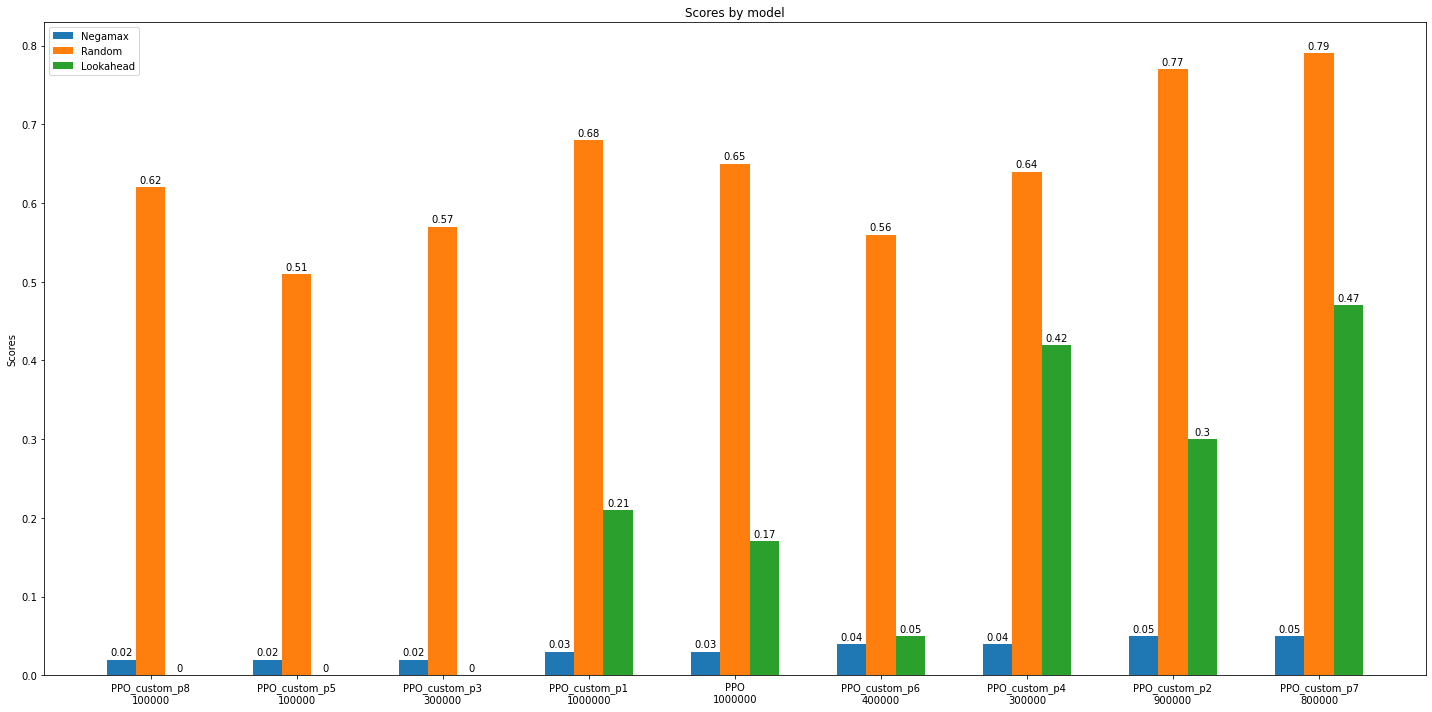

In [6]:
df_top = df.copy()

df_top = df_top.sort_values(by=['vs negamax'])
df_top = df_top.drop_duplicates(subset = ["model"], keep='last')
plot_results(df_top)

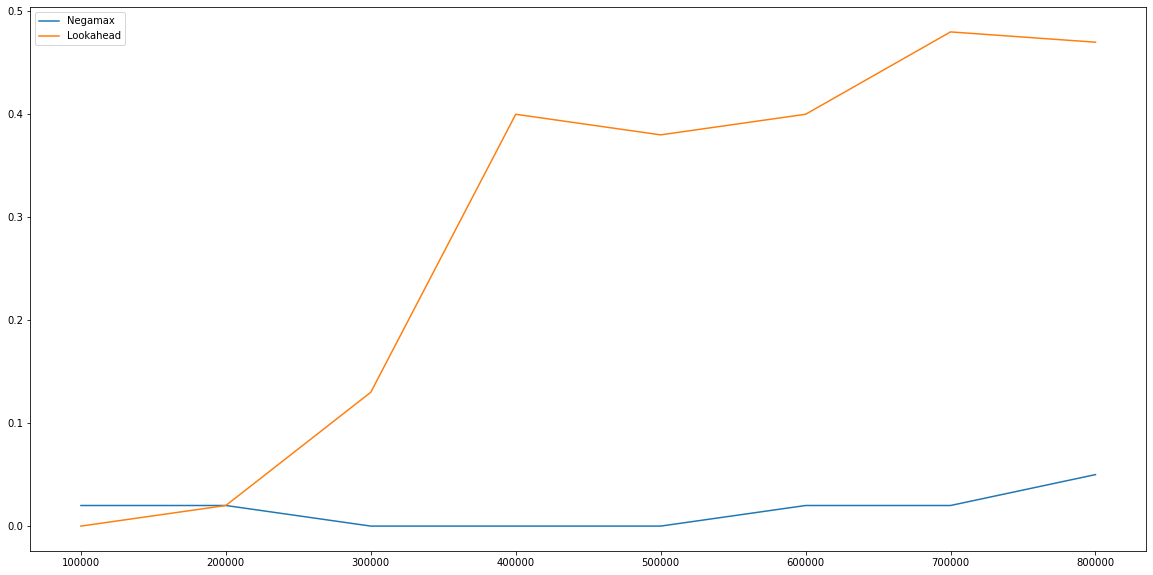

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

df_ppo = df.sort_values(by=['step'])

models = df_ppo[df_ppo['model']=='PPO_custom_p7']

ax.plot(models['step'], models['vs negamax'], label="Negamax")
#ax.plot(models['step'], models['vs random'], label="Random")
ax.plot(models['step'], models['vs lookahead'], label="Lookahead")

ax.legend()

plt.show()

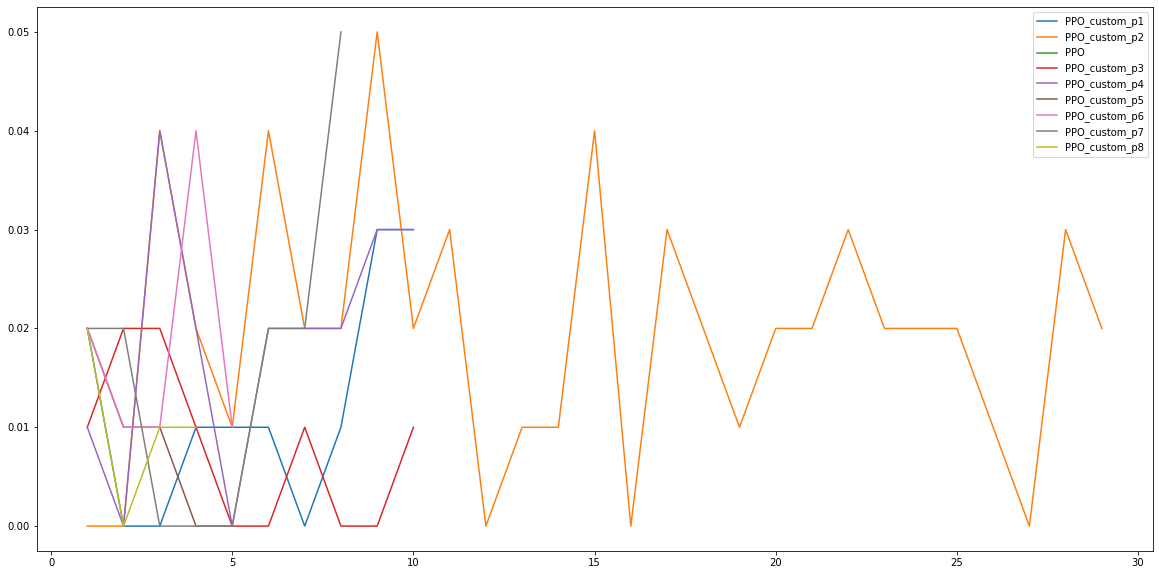

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
df_ppo = df.sort_values(by=['step'])

for model in pd.unique(df['model']):
    models = df_ppo[df_ppo['model']==model]
    ax.plot(models['step']/100000, models['vs negamax'], label=model)
    
ax.legend()

plt.show()
